# 그라운딩- 사실에 기반했는가??
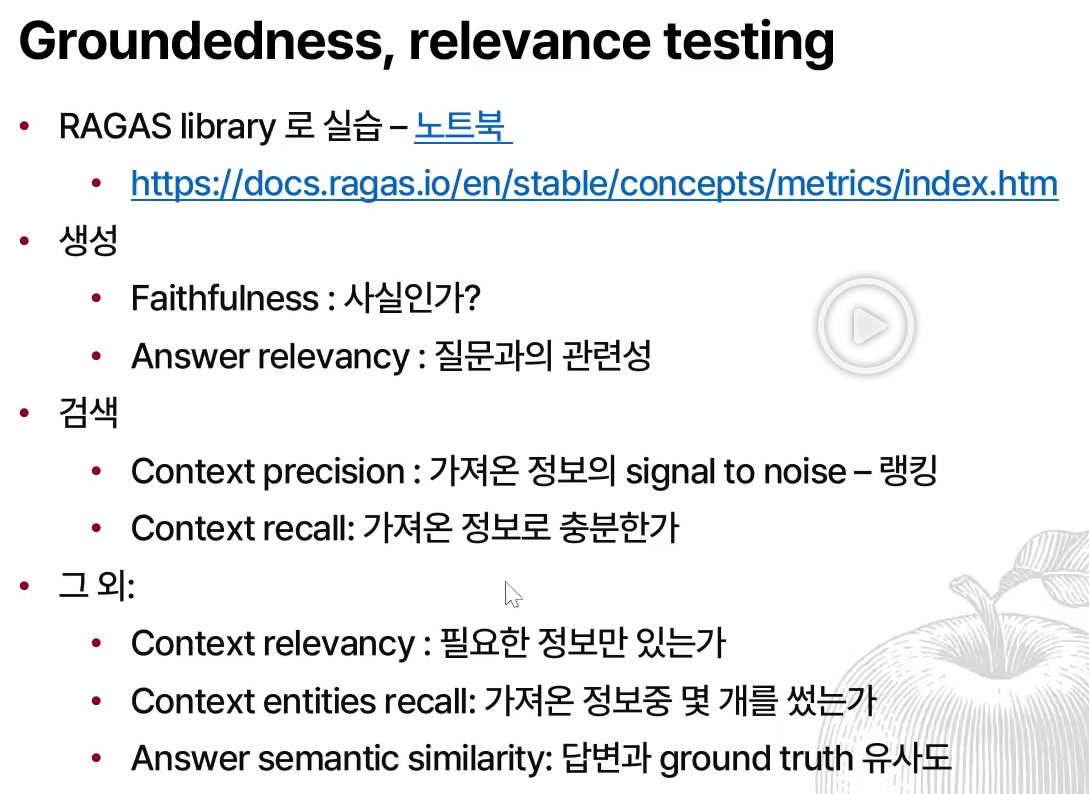

In [1]:
!pip install --upgrade --quiet openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.5/328.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.3 MB/s eta 0:00:00


In [2]:
import os, openai
from google.colab import userdata
os.environ["OPENAI_API_KEY"]=userdata.get('op')
openai.api_key = os.getenv("OPENAI_API_KEY")

In [3]:
from openai import OpenAI

client=OpenAI()

In [5]:
!pip install --upgrade --quiet ragas

In [14]:
from datasets import Dataset
from ragas import evaluate
from ragas.metrics import answer_relevancy, faithfulness, context_recall, answer_correctness, context_precision
import ragas
def ragas_evaluate(eval_sets):
  return evaluate(
      eval_sets,
      metrics=[
          context_precision,
          faithfulness,
          answer_relevancy,
          context_recall,
          answer_correctness
      ]
  )

In [16]:
import nest_asyncio
import asyncio

# nest_asyncio 적용
nest_asyncio.apply()
'''
RuntimeError: This event loop is already running
이 오류가 발생하면 추가해서 사용 해야함
'''

In [18]:

busan_context_right=[
    "Busan is divided into 15 major administrative districts and a single county, together housing a population of approximately 3.6 million.",
    "Busan, officially Busan Metropolitan City, is South Korea's second most populous city after Seoul.",
    "부산광역시는 한반도 남동부에 위치한 광역시이다. 대한민국의 제2의 도시이자 최대의 해양 도시이며, 부산항을 중심으로 해상 무역과 물류 산업이 발달하였다."
]   #참고 자료 실제로 쓸때는 리트리버에서 가져온거 넣어주겠지?

busan_context_wrong_1=["부산에는 호떡이 맛있다.","부산에는 언덕이 많다."]
busan_context_wrong_2=["호떡이 맛있다.","언덕이 많다."]
#질답 세트를 만들어서 확인- 세트 1
# 정답, 그리고 좋은 컨텍스트
eval_set={
  "question":["대한민국에서 두번째로 큰 도시는 어디야?"],#질문
  "answer":["대한민국에서 두번째로 큰 도시는 부산입니다."], #모델이 내놓은 답
  'contexts':[busan_context_right],#참고 자료
  "ground_truth":["부산"]
}
eval_sets=Dataset.from_dict(eval_set)
ragas_evaluate(eval_sets)

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

{'context_precision': 1.0000, 'faithfulness': 1.0000, 'answer_relevancy': 0.9950, 'context_recall': 1.0000, 'answer_correctness': 0.9729}

In [19]:
#세트 2
#오답, 그러나 좋은 컨텍스트, 답은 있지만 대답을 못함
eval_set={
  "question":["대한민국에서 두번째로 큰 도시는 어디야?"],#질문
  "answer":["부산은 한국에 있다."], #모델이 내놓은 답
  'contexts':[busan_context_right],#참고 자료
  "ground_truth":["부산"]
}
eval_sets=Dataset.from_dict(eval_set)
ragas_evaluate(eval_sets)

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

{'context_precision': 0.5833, 'faithfulness': 1.0000, 'answer_relevancy': 0.8117, 'context_recall': 1.0000, 'answer_correctness': 0.7295}

In [20]:
#세트 3
#정답, 그러나 불량 컨텍스트.
eval_set={
  "question":["대한민국에서 두번째로 큰 도시는 어디야?"],#질문
  "answer":["한국에서 두번째로 큰 도시는 부산"], #모델이 내놓은 답
  'contexts':[busan_context_wrong_1],#참고 자료
  "ground_truth":["부산"]
}
eval_sets=Dataset.from_dict(eval_set)
ragas_evaluate(eval_sets)

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

{'context_precision': 0.0000, 'faithfulness': 0.0000, 'answer_relevancy': 0.9779, 'context_recall': 0.0000, 'answer_correctness': 0.9764}

In [21]:
#세트 4
#정답, 그러나 불량 컨텍스트.
eval_set={
  "question":["대한민국에서 두번째로 큰 도시는 어디야?"],#질문
  "answer":["한국에서 두번째로 큰 도시는 부산"], #모델이 내놓은 답
  'contexts':[busan_context_wrong_2],#참고 자료
  "ground_truth":["부산"]
}
eval_sets=Dataset.from_dict(eval_set)
ragas_evaluate(eval_sets)

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

{'context_precision': 0.0000, 'faithfulness': 1.0000, 'answer_relevancy': 0.9781, 'context_recall': 0.0000, 'answer_correctness': 0.9764}

In [22]:
#세트 5
#오답, 그러나 좋은 컨텍스트, 답은 있지만 대답을 못함
eval_set={
  "question":["대한민국에서 두번째로 큰 도시는 어디야?"],#질문
  "answer":["대구"], #모델이 내놓은 답
  'contexts':[busan_context_right],#참고 자료
  "ground_truth":["부산"]
}
eval_sets=Dataset.from_dict(eval_set)
ragas_evaluate(eval_sets)

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

{'context_precision': 1.0000, 'faithfulness': 1.0000, 'answer_relevancy': 0.8302, 'context_recall': 1.0000, 'answer_correctness': 0.2128}